# Goal of the Project:
The goal of the project is to analyze the data in order to understand and derive insights of user behavior and revenue patterns in the telecommunications company Megaline. The study involves cleaning and aggregating user data, incorporating information about calling plans, messages, internet usage and analyzing revenue generation.
This will enable the company to make informed decisions about its plans. By understanding which plans are more profitable and how users interact with the services, the company can optimize its offerings and potentially increase customer satisfaction.

## Initialization

In [1]:
# Loading all the libraries
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats as st
import math
import seaborn as sns
import numpy as np

## Load data

In [2]:
# Load the data files into different DataFrames

calls = pd.read_csv('/datasets/megaline_calls.csv')
internet = pd.read_csv('/datasets/megaline_internet.csv')
messages = pd.read_csv('/datasets/megaline_messages.csv')
plans = pd.read_csv('/datasets/megaline_plans.csv')
users = pd.read_csv('/datasets/megaline_users.csv')

## Prepare the data

[The data for this project is split into several tables. Explore each one to get an initial understanding of the data. Do necessary corrections to each table if necessary.]

## Plans

In [3]:
# Print the general/summary information about the plans' DataFrame
plans.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [4]:
# Print a sample of data for plans
plans.head()


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


The data types for each column seem appropriate. Integer types (int64) are used for numerical quantities, and float types (float64) are used for columns involving cost, which is suitable for the columns.
It is clear that there are no missing values in any of the columns, which is a positive aspect.

## Fix data

No issues were found

## Enrich data

There is nothing to add to the data

## Users

In [5]:
# Print the general/summary information about the users' DataFrame
users.info(show_counts=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [6]:
# Print a sample of data for users
users.head()


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


From the data above we see reg_date, churn_date have the wrong datatype. Also there are missing values in the churn_date column and user_id is of the wrong data type. The data can be further enhanced by having city and states seperated and cleaned up.

### Fix Data

[Fix obvious issues with the data given the initial observations.]

In [7]:
users['user_id'] = users['user_id'].astype(str)

In [8]:
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d', errors='coerce')
users['churn_date'] = pd.to_datetime(users['churn_date'],format='%Y-%m-%d', errors='coerce')
users['churn_date'] = users['churn_date'].fillna('Active')

In [9]:
users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,Active
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,Active
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,Active
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,Active
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,Active


In [10]:
users.duplicated().sum()

0

### Enrich Data

[Add additional factors to the data if you believe they might be useful.]

In [11]:
users['state'] = users['city'].str.split(',').str[1]
users['city'] = users['city'].str.split(',').str[0]
users.loc[:, 'state'] = users['state'].str.replace(' MSA', '')
users['state'] = users['state'].str.strip()
users

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,state
0,1000,Anamaria,Bauer,45,Atlanta-Sandy Springs-Roswell,2018-12-24,ultimate,Active,GA
1,1001,Mickey,Wilkerson,28,Seattle-Tacoma-Bellevue,2018-08-13,surf,Active,WA
2,1002,Carlee,Hoffman,36,Las Vegas-Henderson-Paradise,2018-10-21,surf,Active,NV
3,1003,Reynaldo,Jenkins,52,Tulsa,2018-01-28,surf,Active,OK
4,1004,Leonila,Thompson,40,Seattle-Tacoma-Bellevue,2018-05-23,surf,Active,WA
...,...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,New York-Newark-Jersey City,2018-09-04,surf,Active,NY-NJ-PA
496,1496,Ariel,Shepherd,49,New Orleans-Metairie,2018-02-20,surf,Active,LA
497,1497,Donte,Barrera,49,Los Angeles-Long Beach-Anaheim,2018-12-10,ultimate,Active,CA
498,1498,Scot,Williamson,51,New York-Newark-Jersey City,2018-02-04,surf,Active,NY-NJ-PA


## Calls

In [12]:
# Print the general/summary information about the calls' DataFrame
calls.info(show_counts=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [13]:
# Print a sample of data for calls
calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


From the info above the calls dataframe's column call_date is in the wrong datatype. There seem to be no missing values. However, the user_id is of wrong data type.

### Fix data

[Fix obvious issues with the data given the initial observations.]

In [14]:
calls['user_id'] = calls['user_id'].astype(str)

In [15]:
calls['call_date'] = pd.to_datetime(calls['call_date'])

In [16]:
calls.duplicated().sum()

0

### Enrich data

The datatype for user_id has been corrected and the call_date has been changed to datetime.

In [17]:
calls['duration'] = np.ceil(calls['duration'])
calls

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,9.0
1,1000_145,1000,2018-12-27,14.0
2,1000_247,1000,2018-12-27,15.0
3,1000_309,1000,2018-12-28,6.0
4,1000_380,1000,2018-12-30,5.0
...,...,...,...,...
137730,1499_199,1499,2018-11-21,9.0
137731,1499_200,1499,2018-10-20,11.0
137732,1499_201,1499,2018-09-21,9.0
137733,1499_202,1499,2018-10-10,1.0


The duration column was adjusted, the duration was adjjusted to the highest nearest number.

## Messages

In [18]:
# Print the general/summary information about the messages' DataFrame
messages.info(show_counts=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [19]:
# Print a sample of data for messages
messages.head()


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


There is no null value in the dataframe messages. However, the message_date column is of wrong datatype and user_id is of wrong data type.
 

### Fix data

In [20]:
messages['user_id'] = messages['user_id'].astype(str)

In [21]:
messages['message_date'] = pd.to_datetime(messages['message_date'])
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  object        
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 1.7+ MB


In [22]:
messages.duplicated().sum()

0

### Enrich data

The message_date data type was corrected and user_id data type is changed to string.

## Internet

In [23]:
# Print the general/summary information about the internet DataFrame
internet.info(show_counts=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [24]:
# Print a sample of data for the internet traffic
internet.head()


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

There is no null valuess in the dataframe. Session date is of the wrong datatype. The user_id is wrong data type, and the month can be seperated since the whole data is of the year 2018.

### Fix data

[Fix obvious issues with the data given the initial observations.]

In [25]:
internet['user_id'] = internet['user_id'].astype(str)

In [26]:
internet['session_date'] = pd.to_datetime(internet['session_date'])
internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


In [27]:
internet.duplicated().sum()

0

### Enrich data

In [28]:
internet['month'] = internet['session_date'].dt.month

In [29]:
internet

,id,user_id,session_date,mb_used,month
0,1000_13,1000,2018-12-29,89.86,12
1,1000_204,1000,2018-12-31,0.00,12
2,1000_379,1000,2018-12-28,660.40,12
3,1000_413,1000,2018-12-26,270.99,12
4,1000_442,1000,2018-12-27,880.22,12
...,...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06,10
104821,1499_216,1499,2018-12-30,304.72,12
104822,1499_217,1499,2018-09-22,292.75,9
104823,1499_218,1499,2018-12-07,0.00,12


## Study plan conditions

[It is critical to understand how the plans work, how users are charged based on their plan subscription. So, we suggest printing out the plan information to view their conditions once again.]

In [30]:
# Print out the plan conditions and make sure they are clear for you
plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Aggregate data per user

[Now, as the data is clean, aggregate data per user per period in order to have just one record per user per period. It should ease the further analysis a lot.]

In [31]:
# Calculate the number of calls made by each user per month. Save the result.
calls['month'] = calls['call_date'].dt.month
calls_per_month_per_user = calls.groupby(['user_id', 'month']).size().reset_index(name='calls_count_per_month')
display(calls_per_month_per_user)

,user_id,month,calls_count_per_month
0,1000,12,16
1,1001,8,27
2,1001,9,49
3,1001,10,65
4,1001,11,64
...,...,...,...
2253,1498,12,39
2254,1499,9,41
2255,1499,10,53
2256,1499,11,45


#### Comment for calls count per month
The number of calls each user make per month is displayed. This allows us to see what each individual user do as it relates to the calls being made.

In [32]:
# Calculate the amount of minutes spent by each user per month. Save the result.
minutes_per_month = calls.groupby(['user_id','month'])['duration'].sum().reset_index(name='minutes_per_month')
minutes_per_month

,user_id,month,minutes_per_month
0,1000,12,124.0
1,1001,8,182.0
2,1001,9,315.0
3,1001,10,393.0
4,1001,11,426.0
...,...,...,...
2253,1498,12,339.0
2254,1499,9,346.0
2255,1499,10,385.0
2256,1499,11,308.0


#### Comment for minutes per month
This dataframe now allows us to see how many minutes the individual users use in each month. Its currently sorted by the user_id which id now saved in minutes_per_month.

In [33]:
# Calculate the number of messages sent by each user per month. Save the result.
messages['month'] = messages['message_date'].dt.month
messages_per_month = messages.groupby(['user_id', 'month']).size().reset_index(name='messages_sent_per_month')
messages_per_month

,user_id,month,messages_sent_per_month
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36
...,...,...,...
1801,1496,9,21
1802,1496,10,18
1803,1496,11,13
1804,1496,12,11


#### Comment for messages per month
Another crucial information, the number of messages each user send each month. This information is saved in the messages_per_month variable.

In [34]:
# Calculate the volume of internet traffic used by each user per month. Save the result.
traffic_per_month = internet.groupby(['user_id', 'month'])['mb_used'].sum().reset_index(name='total_mb_per_month')  
traffic_per_month['gb_used'] = (traffic_per_month['total_mb_per_month'] / 1024.0).apply(lambda x: math.ceil(x))
traffic_per_month.drop(columns='total_mb_per_month', inplace=True)
traffic_per_month

,user_id,month,gb_used
0,1000,12,2
1,1001,8,7
2,1001,9,14
3,1001,10,22
4,1001,11,19
...,...,...,...
2272,1498,12,23
2273,1499,9,13
2274,1499,10,20
2275,1499,11,17


#### Comment for Traffic per month 
The traffic per month is the amount of data that is used by each user, this was converted to Gb(1024mb) since the data was in mb. The plans that users use states that if a user uses just 1 mb over it will be considered another Gb.

[Put the aggregate data together into one DataFrame so that one record in it would represent what an unique user consumed in a given month.]

In [35]:
# Merge the data for calls, minutes, messages, internet based on user_id and month
#1. calls, minutes and messages
user_monthly_data1= pd.merge(pd.merge(calls_per_month_per_user, minutes_per_month, on=['user_id', 'month'], how='outer'), messages_per_month, on=['user_id', 'month'], how='outer')
#2. merge with internet
user_monthly_data = pd.merge(user_monthly_data1, traffic_per_month, on=['user_id', 'month'], how='outer')
user_monthly_data


,user_id,month,calls_count_per_month,minutes_per_month,messages_sent_per_month,gb_used
0,1000,12,16.0,124.0,11.0,2.0
1,1001,8,27.0,182.0,30.0,7.0
2,1001,9,49.0,315.0,44.0,14.0
3,1001,10,65.0,393.0,53.0,22.0
4,1001,11,64.0,426.0,36.0,19.0
...,...,...,...,...,...,...
2288,1349,12,NaN,NaN,61.0,13.0
2289,1361,5,NaN,NaN,2.0,2.0
2290,1482,10,NaN,NaN,2.0,NaN
2291,1108,12,NaN,NaN,NaN,1.0


In [36]:
user_monthly_data.fillna(0, inplace=True)
user_monthly_data

,user_id,month,calls_count_per_month,minutes_per_month,messages_sent_per_month,gb_used
0,1000,12,16.0,124.0,11.0,2.0
1,1001,8,27.0,182.0,30.0,7.0
2,1001,9,49.0,315.0,44.0,14.0
3,1001,10,65.0,393.0,53.0,22.0
4,1001,11,64.0,426.0,36.0,19.0
...,...,...,...,...,...,...
2288,1349,12,0.0,0.0,61.0,13.0
2289,1361,5,0.0,0.0,2.0,2.0
2290,1482,10,0.0,0.0,2.0,0.0
2291,1108,12,0.0,0.0,0.0,1.0


All null values are coonverted to 0 for easy calculations

In [37]:
# Add the plan information
user_monthly_data_with_users = pd.merge(user_monthly_data, users, on='user_id', how='left')
user_monthly_data_with_users.head()

,user_id,month,calls_count_per_month,minutes_per_month,messages_sent_per_month,gb_used,first_name,last_name,age,city,reg_date,plan,churn_date,state
0,1000,12,16.0,124.0,11.0,2.0,Anamaria,Bauer,45,Atlanta-Sandy Springs-Roswell,2018-12-24,ultimate,Active,GA
1,1001,8,27.0,182.0,30.0,7.0,Mickey,Wilkerson,28,Seattle-Tacoma-Bellevue,2018-08-13,surf,Active,WA
2,1001,9,49.0,315.0,44.0,14.0,Mickey,Wilkerson,28,Seattle-Tacoma-Bellevue,2018-08-13,surf,Active,WA
3,1001,10,65.0,393.0,53.0,22.0,Mickey,Wilkerson,28,Seattle-Tacoma-Bellevue,2018-08-13,surf,Active,WA
4,1001,11,64.0,426.0,36.0,19.0,Mickey,Wilkerson,28,Seattle-Tacoma-Bellevue,2018-08-13,surf,Active,WA


In [38]:
# Merge user_monthly_data_with_users with plans DataFrame based on 'plan'
user_monthly_data_with_plans = pd.merge(user_monthly_data_with_users, plans, left_on='plan', right_on='plan_name', how='left')
user_monthly_data_with_plans.head()

,user_id,month,calls_count_per_month,minutes_per_month,messages_sent_per_month,gb_used,first_name,last_name,age,city,...,churn_date,state,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,1000,12,16.0,124.0,11.0,2.0,Anamaria,Bauer,45,Atlanta-Sandy Springs-Roswell,...,Active,GA,1000,30720,3000,70,7,0.01,0.01,ultimate
1,1001,8,27.0,182.0,30.0,7.0,Mickey,Wilkerson,28,Seattle-Tacoma-Bellevue,...,Active,WA,50,15360,500,20,10,0.03,0.03,surf
2,1001,9,49.0,315.0,44.0,14.0,Mickey,Wilkerson,28,Seattle-Tacoma-Bellevue,...,Active,WA,50,15360,500,20,10,0.03,0.03,surf
3,1001,10,65.0,393.0,53.0,22.0,Mickey,Wilkerson,28,Seattle-Tacoma-Bellevue,...,Active,WA,50,15360,500,20,10,0.03,0.03,surf
4,1001,11,64.0,426.0,36.0,19.0,Mickey,Wilkerson,28,Seattle-Tacoma-Bellevue,...,Active,WA,50,15360,500,20,10,0.03,0.03,surf


All the cleaned data frame is merged for ease of calculations and assessment o data. They are now in one dataframe called user_monthly_data_with_plans.

[Calculate the monthly revenue from each user (subtract the free package limit from the total number of calls, text messages, and data; multiply the result by the calling plan value; add the monthly charge depending on the calling plan). N.B. This might not be as trivial as just a couple of lines given the plan conditions! So, it's okay to spend some time on it.]

In [39]:
c

,user_id,first_name,last_name,month,plan,city,state,monthly_revenue
0,1000,Anamaria,Bauer,12,ultimate,Atlanta-Sandy Springs-Roswell,GA,70.00
1,1001,Mickey,Wilkerson,8,surf,Seattle-Tacoma-Bellevue,WA,20.00
2,1001,Mickey,Wilkerson,9,surf,Seattle-Tacoma-Bellevue,WA,20.00
3,1001,Mickey,Wilkerson,10,surf,Seattle-Tacoma-Bellevue,WA,90.09
4,1001,Mickey,Wilkerson,11,surf,Seattle-Tacoma-Bellevue,WA,60.00
...,...,...,...,...,...,...,...,...
2288,1349,Florentina,Diaz,12,surf,Boston-Cambridge-Newton,MA-NH,20.33
2289,1361,Jacelyn,Hoffman,5,surf,Birmingham-Hoover,AL,20.00
2290,1482,Armand,Glenn,10,ultimate,New York-Newark-Jersey City,NY-NJ-PA,70.00
2291,1108,Porfirio,Kane,12,ultimate,Salt Lake City,UT,70.00


## Study user behaviour

[Calculate some useful descriptive statistics for the aggregated and merged data, which typically reveal an overall picture captured by the data. Draw useful plots to help the understanding. Given that the main task is to compare the plans and decide on which one is more profitable, the statistics and the plots should be calculated on a per-plan basis.]

[There are relevant hints in the comments for Calls but they are not provided for Messages and Internet though the principle of statistical study is the same for them as for Calls.]

### Calls

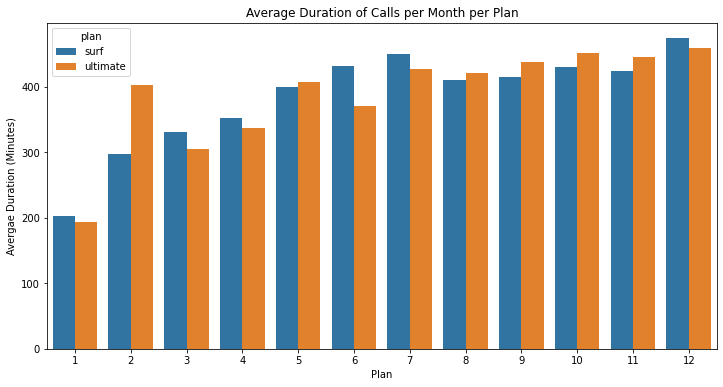

The mean of surf calls is 428.7495232040687, the variance is: 54968.27946065038, the standatd deviation is 234.4531498202794.
The mean of ultimate calls is 430.45, the variance is: 57844.46481223922, the standatd deviation is 240.50876244378128.


In [40]:
# Compare average duration of calls per each plan per each distinct month. Plot a bar plat to visualize it.
monthly_avg_call_duration = user_monthly_data_with_plans.groupby(['plan', 'month']).agg({'minutes_per_month':'mean'}).reset_index()

#plot bar graph
plt.figure(figsize=(12,6))
sns.barplot(data=monthly_avg_call_duration , x='month', y= 'minutes_per_month', hue='plan')
plt.xlabel('Plan')
plt.ylabel('Avergae Duration (Minutes)')
plt.title('Average Duration of Calls per Month per Plan')
plt.xticks(rotation=0)
plt.show()

#Average, Varirance and Standard Deviation
surf_mean_calls = user_monthly_data_with_plans[user_monthly_data_with_plans['plan']=='surf']['minutes_per_month'].mean()
surf_variance_calls = user_monthly_data_with_plans[user_monthly_data_with_plans['plan']=='surf']['minutes_per_month'].var()
surf_std_dev_calls = user_monthly_data_with_plans[user_monthly_data_with_plans['plan']=='surf']['minutes_per_month'].std()
print(f"The mean of surf calls is {surf_mean_calls}, the variance is: {surf_variance_calls}, the standatd deviation is {surf_std_dev_calls}.")

ultimate_mean_calls = user_monthly_data_with_plans[user_monthly_data_with_plans['plan']=='ultimate']['minutes_per_month'].mean()
ultimate_variance_calls = user_monthly_data_with_plans[user_monthly_data_with_plans['plan']=='ultimate']['minutes_per_month'].var()
ultimate_std_dev_calls = user_monthly_data_with_plans[user_monthly_data_with_plans['plan']=='ultimate']['minutes_per_month'].std()

print(f"The mean of ultimate calls is {ultimate_mean_calls}, the variance is: {ultimate_variance_calls}, the standatd deviation is {ultimate_std_dev_calls}.")

#### Comment for average duration of calls made per month per plan
From the graph, the avarage calls made per month for each plans slowly increases as the year progresses. There was a great increase in february for the ultimate plan however for the rest of the year both plans range around the 400 range.

<function matplotlib.pyplot.show(close=None, block=None)>

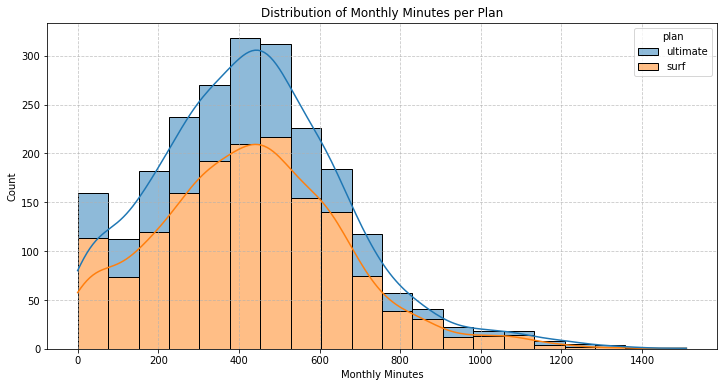

In [41]:
# Compare the number of minutes users of each plan require each month. Plot a histogram.

#plot hist
plt.figure(figsize=(12,6))
sns.histplot(data=user_monthly_data_with_plans, x='minutes_per_month', hue='plan', multiple='stack', bins=20, kde=True)
plt.xlabel('Monthly Minutes')
plt.ylabel('Count')
plt.title('Distribution of Monthly Minutes per Plan')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=0)

plt.show


### Comment for average duration of monthly minutes per plan
Based on the graph above, for each plan the data is skewed right. It shows that majority of the people use less minutes than what is in their plan for the ultimate plan, the limit is 3000/month and users use way less than that with the majority using around 400. In the surf plan we see users surpassing the monthly limit of 500 with the majority using around 400 minutes/month.

[Calculate the mean and the variable of the call duration to reason on whether users on the different plans have different behaviours for their calls.]

In [42]:
# Calculate the mean and the variance of the monthly call duration
call_duration_mean_and_var = user_monthly_data_with_plans.groupby(['month','plan'])['minutes_per_month'].agg(['mean', 'var']).reset_index()
call_duration_mean_and_var

,month,plan,mean,var
0,1,surf,203.000000,15842.000000
1,1,ultimate,193.500000,16572.333333
2,2,surf,297.000000,52226.500000
3,2,ultimate,403.142857,76889.476190
4,3,surf,330.000000,35809.363636
5,3,ultimate,304.250000,61984.931818
6,4,surf,351.540000,50866.743265
7,4,ultimate,336.857143,34888.928571
8,5,surf,399.584416,59754.219754
9,5,ultimate,406.241379,43841.046798


### Comment for average and variance of monthly call duration
from the calculations above, as the year progresses we see that the average durations of calls increase as time progresses

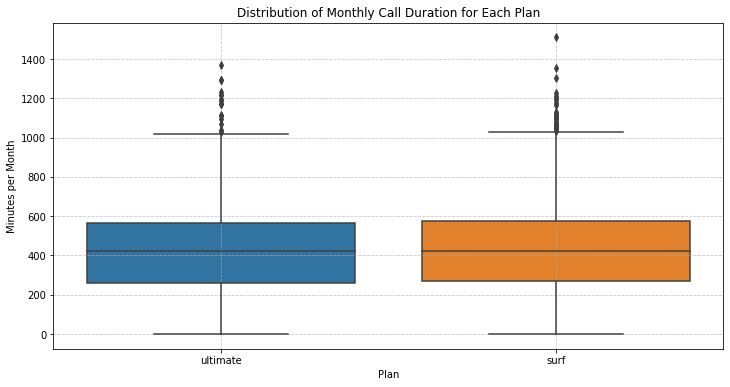

In [43]:
# Plot a boxplot to visualize the distribution of the monthly call duration

#1. Create a boxplot using Seaborn
plt.figure(figsize=(12,6))
sns.boxplot(x='plan', y='minutes_per_month', data=user_monthly_data_with_plans)
plt.title('Distribution of Monthly Call Duration for Each Plan')
plt.xlabel('Plan')
plt.grid(True, linestyle='--', alpha=0.7)
plt.ylabel('Minutes per Month')
plt.show()


### Comment for boxplot of monthly call duration for each plan 
From the box plot above we see that both plans have a median call of about 400 minutes per month, with the data skewed right. Customers make a minimum of 0 calls and a maximum a little below 1000 minutes a month. There are a few outliers, customers that talk over 1000 minutes per month that falls outside the range.

[Formulate conclusions on how the users behave in terms of calling. Is their behaviour different between the plans?]

### Messages

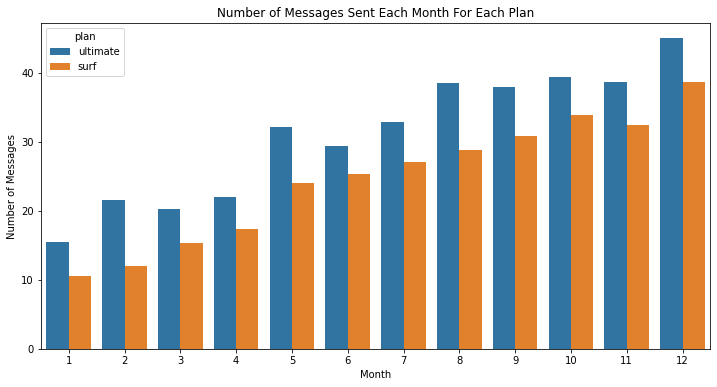

The mean of surf calls is 31.15956770502225, the variance is: 1126.7245219504066, the standatd deviation is 33.566717473569064.
The mean of ultimate calls is 37.55138888888889, the variance is: 1208.756743548138, the standatd deviation is 34.76717911404574.


In [44]:
# Compare the number of messages users of each plan tend to send each month
plt.figure(figsize=(12,6))
sns.barplot(data=user_monthly_data_with_plans, x='month', y='messages_sent_per_month', hue='plan', ci=None)
plt.title('Number of Messages Sent Each Month For Each Plan')
plt.xlabel('Month')
plt.ylabel('Number of Messages')
plt.show()

#Average, Varirance and Standard Deviation
surf_mean_messages = user_monthly_data_with_plans[user_monthly_data_with_plans['plan']=='surf']['messages_sent_per_month'].mean()
surf_variance_messages = user_monthly_data_with_plans[user_monthly_data_with_plans['plan']=='surf']['messages_sent_per_month'].var()
surf_std_dev_messages = user_monthly_data_with_plans[user_monthly_data_with_plans['plan']=='surf']['messages_sent_per_month'].std()
print(f"The mean of surf calls is {surf_mean_messages}, the variance is: {surf_variance_messages}, the standatd deviation is {surf_std_dev_messages}.")

ultimate_mean_messages = user_monthly_data_with_plans[user_monthly_data_with_plans['plan']=='ultimate']['messages_sent_per_month'].mean()
ultimate_variance_messages = user_monthly_data_with_plans[user_monthly_data_with_plans['plan']=='ultimate']['messages_sent_per_month'].var()
ultimate_std_dev_messages = user_monthly_data_with_plans[user_monthly_data_with_plans['plan']=='ultimate']['messages_sent_per_month'].std()
print(f"The mean of ultimate calls is {ultimate_mean_messages}, the variance is: {ultimate_variance_messages}, the standatd deviation is {ultimate_std_dev_messages}.")

### Comment for Number of Messages Sent Each Month For Each Plan
Based on the graph above, text messages gradually increase over the course of the year for both plans. The surf plan had a more gradual increasea as the ultimate increase overall in fluctuations. The ultimate plan users have 1,000 text mmessages however they do not use it  as much, they use an average of 38. The surf plan users however use almost all of their plan's messages allowed as the year progresses, they are allowed 50 and use an average of 31.

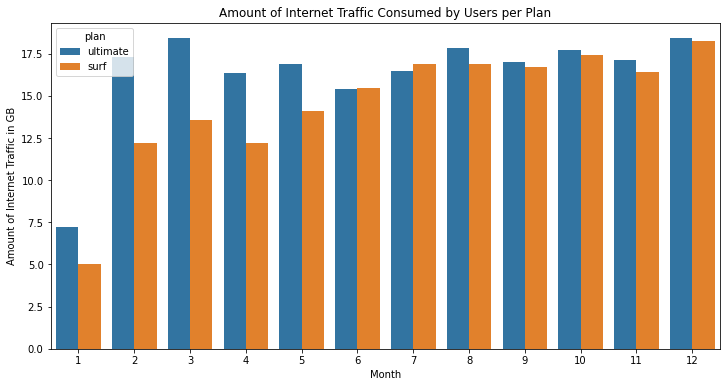

In [45]:
# Compare the amount of internet traffic consumed by users per plan
plt.figure(figsize=(12,6))
sns.barplot(data=user_monthly_data_with_plans, x='month', y='gb_used', hue='plan', ci=None)
plt.title('Amount of Internet Traffic Consumed by Users per Plan')
plt.xlabel('Month')
plt.ylabel('Amount of Internet Traffic in GB')
plt.show()

[Formulate conclusions on how the users behave in terms of messaging. Is their behaviour different between the plans?]

### Comment for Amount of Internet Traffic Consumed by Users per Plan
From the graph above, the amount of internet traffic that is used by users of each plan gradually increases. The with ultimate plan have a higher usage than those with the surf plan. 

### Internet

In [46]:
monthly_internet_usage_per_plan = user_monthly_data_with_plans.groupby(['plan','month']).agg({'gb_used':'sum'}).reset_index()
monthly_internet_usage_per_plan

,plan,month,gb_used
0,surf,1,10.0
1,surf,2,110.0
2,surf,3,312.0
3,surf,4,611.0
4,surf,5,1087.0
5,surf,6,1502.0
6,surf,7,2042.0
7,surf,8,2735.0
8,surf,9,3238.0
9,surf,10,4126.0


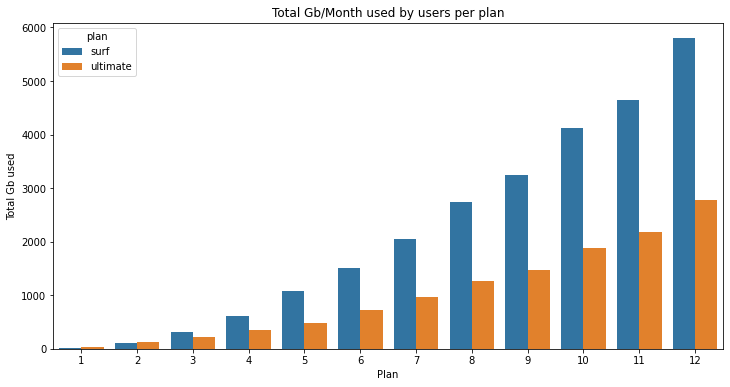

In [47]:
plt.figure(figsize=(12,6))
sns.barplot(data=monthly_internet_usage_per_plan , x='month', y= 'gb_used', hue='plan')
plt.xlabel('Plan')
plt.ylabel('Total Gb used')
plt.title('Total Gb/Month used by users per plan')
plt.xticks(rotation=0)
plt.show()

[Formulate conclusions on how the users tend to consume the internet traffic? Is their behaviour different between the plans?]

### Comment for Total Gb/Month used by users per plan
From the graph above, the total Gb of data by users of each plan increase gradually as the year progresses. This shows that the surf plan though they have the lowest monthly limit of 15Gb of data a month they use the most data which means they pay alot of overage compared to the ultimate plan users that have 30 Gb/ month but use way less data.

## Revenue

[Likewise you have studied the user behaviour, statistically describe the revenue between the plans.]

In [48]:
revenue_statistics = user_monthly_revenue.groupby('plan')['monthly_revenue'].describe()
revenue_statistics

,count,mean,std,min,25%,50%,75%,max
plan,,,,,,,,
surf,1573.0,60.706408,55.388042,20.0,20.0,40.36,80.36,590.37
ultimate,720.0,72.313889,11.395108,70.0,70.0,70.00,70.00,182.00


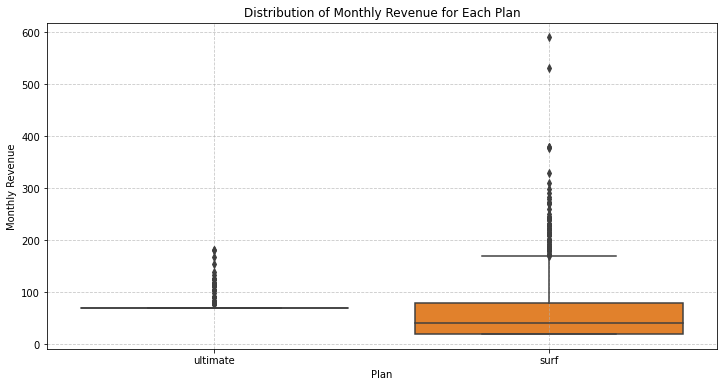

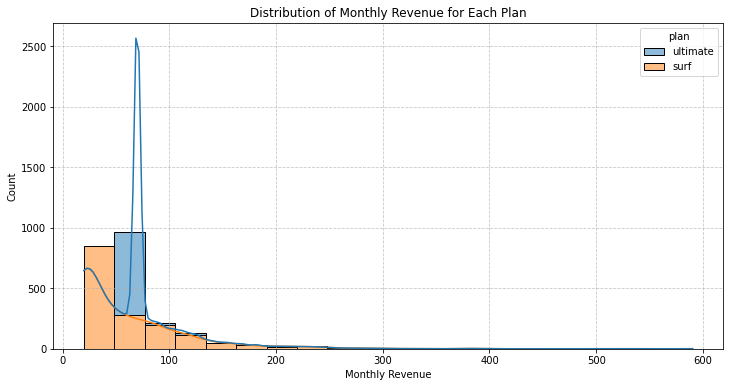

The mean of surf calls is 60.706408137317226, the variance is: 3067.835152293878, the standatd deviation is 55.388041600095214.
The mean of ultimate calls is 72.31388888888888, the variance is: 129.8484855509195, the standatd deviation is 11.395107965742119.


In [49]:
# Set up the plot
plt.figure(figsize=(12, 6))

# Create a boxplot to visualize the distribution of monthly revenue for each plan
sns.boxplot(x='plan', y='monthly_revenue', data=user_monthly_revenue)

# Add labels and title
plt.title('Distribution of Monthly Revenue for Each Plan')
plt.xlabel('Plan')
plt.ylabel('Monthly Revenue')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Set up the plot for histograms
plt.figure(figsize=(12, 6))

# Create histograms to visualize the distribution of monthly revenue for each plan
sns.histplot(data=user_monthly_revenue, x='monthly_revenue', hue='plan', multiple='stack', bins=20, kde=True)

# Add labels and title
plt.title('Distribution of Monthly Revenue for Each Plan')
plt.xlabel('Monthly Revenue')
plt.ylabel('Count')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

#Average, Varirance and Standard Deviation
surf_mean_calls = user_monthly_revenue[user_monthly_revenue['plan']=='surf']['monthly_revenue'].mean()
surf_variance_calls = user_monthly_revenue[user_monthly_revenue['plan']=='surf']['monthly_revenue'].var()
surf_std_dev_calls = user_monthly_revenue[user_monthly_revenue['plan']=='surf']['monthly_revenue'].std()
print(f"The mean of surf calls is {surf_mean_calls}, the variance is: {surf_variance_calls}, the standatd deviation is {surf_std_dev_calls}.")

ultimate_mean_calls = user_monthly_revenue[user_monthly_revenue['plan']=='ultimate']['monthly_revenue'].mean()
ultimate_variance_calls = user_monthly_revenue[user_monthly_revenue['plan']=='ultimate']['monthly_revenue'].var()
ultimate_std_dev_calls = user_monthly_revenue[user_monthly_revenue['plan']=='ultimate']['monthly_revenue'].std()

print(f"The mean of ultimate calls is {ultimate_mean_calls}, the variance is: {ultimate_variance_calls}, the standatd deviation is {ultimate_std_dev_calls}.")

Fro the graph above, Distribution of Monthly Revenue for Each Plan, we see that majority of users from the ultimate plan stay within the boundaries of the plan with only a few using above the monthly limit, while the surf plan users tend to use more than the boundaries of the plan, meaning they pay more overage. This can be seen by the mean calculations  where the average revenue for the ultimate plan is 72 dollars while the plan costs 70 dollars and the average revenue for the surf plan is 60 dollars even tho the plan costs 30 dollars.

## Test statistical hypotheses

[Test the hypothesis that the average revenue from users of the Ultimate and Surf calling plans differs.]

[Formulate the null and the alternative hypotheses, choose the statistical test, decide on the alpha value.]

## Null Hypothesis (H0):

### There is no significant difference in monthly revenue between the "surf" and "ultimate" plans.
H0: μ_surf = μ_ultimate (where μ represents the population mean)

Alternative Hypothesis

(H1):There is a significant difference in monthly revenue between the "surf" and "ultimate" plans.
H1: μ_surf ≠ μ_ultimate

T-statistic: A positive t-statistic indicates that the mean revenue for "surf" is higher, while a negative value suggests the opposite.
P-value: If the p-value is less than the significance level (commonly 0.05), you reject the null hypothesis. A smaller p-value suggests stronger evidence against the null hypothesis.

Alpha: 0.05

In [50]:
# Test the hypotheses
#1. Finding H0 and H1
revenue_surf = user_monthly_revenue[user_monthly_revenue['plan']=='surf']['monthly_revenue']
revenue_ultimate = user_monthly_revenue[user_monthly_revenue['plan']=='ultimate']['monthly_revenue']

alpha = 0.05 #set a critical statistical significance level

#test the hypothesis that the means of the two independent populations are equal
result1 = st.ttest_ind(revenue_surf, revenue_ultimate)

#print the p-value
print('p-value:', result1.pvalue)

#compare the p-values you get with the statistical significance level
if result1.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value: 2.862674510698644e-08
We reject the null hypothesis


[Test the hypothesis that the average revenue from users in the NY-NJ area is different from that of the users from the other regions.]

[Formulate the null and the alternative hypotheses, choose the statistical test, decide on the alpha value.]

In [51]:
# Test the hypotheses
revenue_nj = user_monthly_revenue[user_monthly_revenue['state']=='NY-NJ-PA']['monthly_revenue']
other_regions_revenue = user_monthly_revenue[user_monthly_revenue['state']!='NY-NJ-PA']['monthly_revenue']

alpha = 0.05 #set a critical statistical significance level

#test the hypothesis that the means of the two independent populations are equal
result2 = st.ttest_ind(revenue_nj, other_regions_revenue)

#print the p-value
print('p-value:', result2.pvalue)

#compare the p-values you get with the statistical significance level
if result2.pvalue < alpha:
    print("We reject the null hypothesis (the means are different)")
else:
    print("We can't reject the null hypothesis (the means are equal)")

p-value: 0.043557431621342436
We reject the null hypothesis (the means are different)


## General conclusion

[List your important conclusions in this final section, make sure they cover all those important decisions (assumptions) that you've made and that led you to the way you processed and analyzed the data.]

The data was cleaned, analyzed, enriched and then merged. After merging the data each individual aspects of the plan was analyzed after putting it on a graph to study user behaviour and revenue.  The user behaviour showed alot of information along with the revenue. These are the findings:

#### Call Duraton Analysis:
- Users on the surf plan tend to have a lower average call duration than those of the ultimate. However the average is not by much as the difference is 2 minutes. The ultimate plan shows a wider distribution of call durations, possibly indicating varied user behavior.
- The ultimate plan limit is 3000/month and users use way less than that with the majority using around 400. In the surf plan we see users surpassing the monthly limit of 500 with the majority using around 400 minutes/month.

#### Messages Analysis:
- The ultimate plan users have 1,000 text mmessages however they do not use it as much, they use an average of 38. The surf plan users however use almost all of their plan's messages allowed as the year progresses, they are allowed 50 and use an average of 31.
- The analysis of messaging behavior did not reveal significant differences between users on the surf and ultimate plans.

#### Internet Usage Analysis:
- The volume of data that the ultimate plan users use is very signficantly lower than that of the surf plan users. This shows that the surf plan users have alot of overage on their data plan, with an alotted 15Gb/month.

#### Monthly Revenue Comparison:
- The majority of users of the ultimate plan stick within the boundaries of the plan, because of this the average monthly revenue of the ultimate plan is: 72 dollars and the cost of the plan is 70 dollars. The surf plan users who whose plan cost 20 dollars have a monthly revenue of 60 dollars which is 3 times the cost.

#### Null Hypothesis:
- 1. Hypothesis was tested: the average revenue from users of the Ultimate and Surf calling plans differs. The p-value is less than the significance level (commonly 0.05), so the null hypothesis was rejected of the ultimate and surf plans having equal averages, which means they have different revenues. 
- 2. For the Hypothesis of the average revenue from users in the NY-NJ area is different from that of the users from the other regions: 
- There is a statistically significant difference in average monthly revenue between users in the NY-NJ-PA area and users in other regions. This difference could have implications for marketing strategies or service offerings in these regions. The limited sample size in the NY-NJ area is crucial to interpret the results cautiously. A larger sample size could provide more robust and reliable conclusions about revenue differences between the NY-NJ area and other regions. 

#### Visualization of the Revenue:
- Boxplots, histograms visually represent the distribution of monthly revenue, aiding in identifying outliers and understanding revenue patterns. 